<h1><center><b>Práctica 0<b/><center/></h1>

Autor: Francisco Pertíñez Perea

DNI: 77765690E

**Ejercicio 1**
 
 - Leer la base de datos de Iris que hay en scikit-learn.
 - Obtener las características (datos de entrada X) y la clase (Y).
 - Quedarse con las características primera y tercera.
 - Visualizar con un Scatter Plot los datos, coloreando cada clase con un color diferente e indicando con una leyenda la clase a la que corresponde cada color.

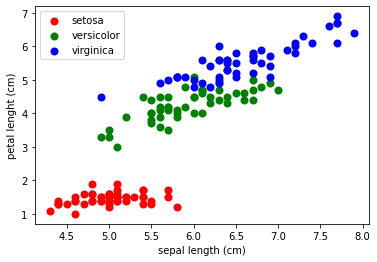

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import sklearn as skl
from sklearn.datasets import load_iris
import numpy as np


# Leer la base de datos de Iris
iris_db = skl.datasets.load_iris()

# Obtener características y clase
x = iris_db.data
y = iris_db.target

# Quedarse con las características primera y tercera
x = x[:,0:3:2]

"""
Funcion que devuelve la primera posición en la lista de 
clases de la primera muestra de una clase.

Parámetros:
  - y: lista de clases de muestras de la forma [0,0,0,...,1,1,1,...,2,2,2,..., n,n,n]; tal que
     cada n es una clase.
  
  - cls: una de las n clases.

Precondición: que el array de clases esté ordenado de tal manera que primero se encuentren todas las muestras
de la clase 1, despues las de la clase 2, ... , y al final las de la clase n

Poscondición: Si hay una muestra de dicha clase retornará la posción de la primera,
en caso contrario retornará -1

Retorna: primera posición de la primera muestra de la clase pasada como parámetro.
"""
def get_first_index(y, cls):
  for i in range(0, len(y)):
    if(y[i] == cls):
      return i
  
  return -1
    

# Visualizar con Scatter Plot los datos
plt.xlabel("sepal length (cm)")
plt.ylabel("petal lenght (cm)")

plt.scatter(x[:get_first_index(y, 1), 0], x[:get_first_index(y, 1), 1], label = "setosa", c = "r", linewidths = 2)
plt.scatter(x[get_first_index(y, 1):get_first_index(y, 2), 0], x[get_first_index(y, 1):get_first_index(y, 2), 1], label = "versicolor", c = "g", linewidths = 2)
plt.scatter(x[get_first_index(y, 2):,0], x[get_first_index(y, 2):,1], label = "virginica", c = "b", linewidths = 2)

plt.legend()

plt.show()





**Ejercicio 2.**

 - Separar en training (80% de los datos) y test (20%) aleatoriamente, conservando las proporción de elementos en cada clase tanto en training como en test. Con "aleatoriamente" nos referimos a que no sería válido escoger como conjunto de entrenamiento el 80% inicial de ejemplos de cada clase y como conjunto de test el 20% final. Es decir, los ejemplos deben desordenarse con respecto al orden original. En la implementación de este ejercicio no se puede recurrir a funciones como train_test_split de scikit-learn o similares.

 - Se debe imprimir por terminal el número resultante de ejemplos de cada clase tanto en entrenamiento como en test, así como las clases de cada uno de los ejemplos de entrenamiento y test, así como las clases de cada uno de los ejemplos de entrenamiento y test.
 

In [3]:
# Para no perder la relación de cada muestra con su clase al desordenar las listas x e y, creo una lista de tuplas 
# en el que cada tupla es de la forma (características de la muestra, clase de la muestra)
tuple_list = list(zip(x, y))

# Desordenamos la lista
np.random.shuffle(tuple_list)

"""
Función que calcula el número de muestras de una clase que hay en una lista.

Parámetros:
  - y: lista con las clases de cada muestra.
  - cls: clase de la que se quiere contar el número de muestras

Retorna: número de muestras de la clase pasada como parámetro.
"""
def count_class_len(y, cls):
  count = 0
  for i in y:
    if(i == cls):
      count += 1
  
  return count

"""
Función que, a partir de un conjunto de muestras con muestras de distintas clases,
separa este en dos conjuntos distintos: un conjunto de entrenamiento (80% datos) y un conjunto de
test (20%).

Parámetros: 
  - Class_len_list: lista en la que cada componente i contiene el número de muestras de la clase i-ésima

  - sample_set: conjunto de muestras, el cual es una lista de tuplas en el 
    que cada tupla es de la forma (características de la muestra, clase de la muestra)

  - training_set_x: lista de características de cada muestra del conjunto de entrenamiento

  - training_set_y: lista de clases de cada muestra del conjunto de entrenamiento

  - test_set_x: lista de características de cada muestra del conjunto de test

  - test_set_y: lista de clases de cada muestra del conjunto de test

 Precondición: sample_test debe de estar priviamente desordenado de manera aleatoria.

 Poscondición: si las precondiciones se cumplen, en training_set y test_set deberíamos tener unos 
 de entrenamiento/test totalmente aleatorios y distribuidos de manera equitativa entre las distintas clases.
"""
def train_test_split_own_self(class_len_list, sample_set, training_set_x, training_set_y, test_set_x, test_set_y):

  #Calculamos 80% de los datos de cada clase
  training_c0_len = class_len_list[0] * 80 / 100
  training_c1_len = class_len_list[1] * 80 / 100
  training_c2_len = class_len_list[2] * 80 / 100

  # Contadores de cuantas muestras de cada clase llevamos insertadas en
  # el conjunto de entrenamiento
  c0 = 0
  c1 = 0
  c2 = 0

  for sample in sample_set:
    # Si la muestra es de la clase 0
    if(sample[1] == 0):
      # Si aun se necesitan muestras en el conjunto de entrenamiento de la clase 0
      if(c0 < training_c0_len):
        training_set_x.append(sample[0])
        training_set_y.append(sample[1])
        c0 += 1
      # Si no es así, al conjunto de test de la clase 0    
      else:
        test_set_x.append(sample[0])
        test_set_y.append(sample[1])
    # Equivalente para la clase 1
    elif(sample[1] == 1):
      if(c1 < training_c1_len):
        training_set_x.append(sample[0])
        training_set_y.append(sample[1])
        c1 += 1
      else:
        test_set_x.append(sample[0])
        test_set_y.append(sample[1])
    # Equivalente para la clase 2
    elif(sample[1] == 2):
      if(c2 < training_c2_len):
        training_set_x.append(sample[0])
        training_set_y.append(sample[1])
        c2 += 1
      else:
        test_set_x.append(sample[0])
        test_set_y.append(sample[1])

# Preparar parámetros para la función
class_len_list = [count_class_len(y, 0), count_class_len(y, 1), count_class_len(y, 2)]

training_set_x = list()
training_set_y = list()
test_set_x = list()
test_set_y = list()

# Usar la función
train_test_split_own_self(class_len_list, tuple_list, training_set_x, training_set_y, test_set_x, test_set_y)

# Salida por pantalla
print("--- Clase setosa ---")
print("Ejemplos train: ", count_class_len(training_set_y, 0))
print("Ejemplos test: ", count_class_len(test_set_y, 0))

print("--- Clase versicolor ---")
print("Ejemplos train: ", count_class_len(training_set_y, 1))
print("Ejemplos test: ", count_class_len(test_set_y, 1))

print("--- Clase virginica ---")
print("Ejemplos train: ", count_class_len(training_set_y, 2))
print("Ejemplos test: ", count_class_len(test_set_y, 2))

print("Clase de los ejemplos de entrenamiento:")
print(training_set_y)

print("Clase de los ejemplos de test:")
print(test_set_y)


--- Clase setosa ---
Ejemplos train:  40
Ejemplos test:  10
--- Clase versicolor ---
Ejemplos train:  40
Ejemplos test:  10
--- Clase virginica ---
Ejemplos train:  40
Ejemplos test:  10
Clase de los ejemplos de entrenamiento:
[1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2]
Clase de los ejemplos de test:
[1, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2]


**Ejercicio 3.**

 - Obtener 100 valores equiespaciados entre 0 y 4π.

 - Obtener el valor de $10^{-5}\cdot \sinh(x)$, $\cos(x)$ y $\tanh(2\cdot \sin(x) - 4\cdot \cos (x))$ para los 100 valores anteriormente calculados.

 - Visualizar las tres curvas simultáneamente en el mismo plot (con líneas discontínuas en verde negro y rojo) e incluir la leyenda correspondiente. 

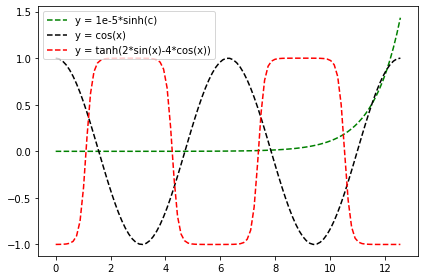

In [4]:
# 100 valores equiespaciados entre 0 y 4*pi
l = np.linspace(0, 4 * np.pi, 100)

# Obtenemos los valores
a = 10**(-5) * np.sinh(l)
b = np.cos(l)
c = np.tanh(2 * np.sin(l) - 4 * np.cos(l))

# Salida por pantalla
plt.plot(l, a, "g--", l, b, "k--", l, c, "r--")
plt.legend(("y = 1e-5*sinh(c)", "y = cos(x)", "y = tanh(2*sin(x)-4*cos(x))"), loc = "upper left", )
plt.tight_layout()
plt.show()

**Ejercicio 4.**
 - Mostrar dos fucniones 3D dentro de la misma figura. Las funciones a mostrar son las siguientes.
  - $f(x, y) = 1 - |x + y| - |y - x|$
  
  - $f(x, y) = x ⋅ y ⋅ e^{(-x^2 - y^2)}$

- Como se indicaba, ambas funciones deben mostrarse dentro de la misma figura/ventana como surface plots.

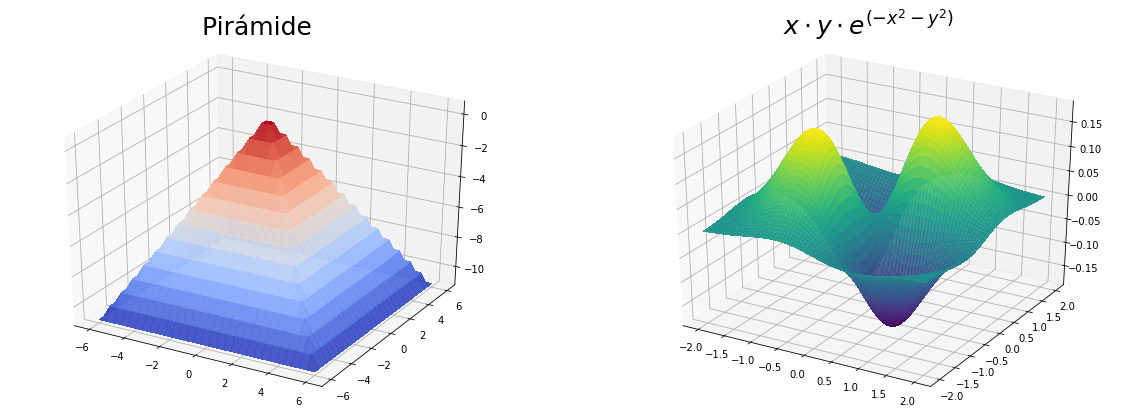

In [5]:
# Ajustar tamaño de las figuras
fig = plt.figure(figsize=(20,7))

# =============
# Primer gráfico
# =============

# Definir ejes
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Puntos equiespaciados
X = np.linspace(-6, 6, 30)
Y = np.linspace(-6, 6, 30)

# Montar matriz de coordenadas
X, Y = np.meshgrid(X, Y)

# Aplicar función
Z = 1 - np.abs(X + Y) - np.abs(Y - X)

# Definir superficie
ax.set_title(r'Pirámide ', fontsize=25, pad = 25)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, alpha=0.95, antialiased=False)
# ==============
# Segundo gráfico
# ==============

# Definir ejes
ax = fig.add_subplot(1, 2, 2, projection='3d')

# Puntos equiespaciados
X = np.linspace(-2, 2, 70)
Y = np.linspace(-2, 2, 70)

# Montar matriz de coordenadas
X, Y = np.meshgrid(X, Y)

# Aplicar función
Z = X * Y * np.e**((-X**2) - (Y**2))

# Definir superficie
ax.set_title(r'$x \cdot y \cdot e^{(-x^{2} - y^{2})}$ ', fontsize=25, pad = 25)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis,
                       linewidth=0, alpha=0.9, antialiased=False)

# Mostrar graficos
plt.show()